In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
#Data reading
df = pd.read_csv("worldcoin-org_2023-07-24_2024-04-15.csv")
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-14,2024-04-15,570.171778,670.487110,556.812927,661.451697,1.857144e+11,1.148259e+11
1,2024-04-13,2024-04-14,704.601712,712.014992,498.394984,572.976069,1.666582e+11,1.230839e+11
2,2024-04-12,2024-04-13,835.801622,870.721399,654.919501,710.703011,8.572999e+10,1.482425e+11
3,2024-04-11,2024-04-12,856.083116,894.914461,829.457920,833.627164,7.119291e+10,1.551272e+11
4,2024-04-10,2024-04-11,867.276535,877.307242,826.585311,859.108166,6.967570e+10,1.549334e+11
...,...,...,...,...,...,...,...,...
261,2023-07-28,2023-07-29,269.972548,290.480844,268.198973,289.579376,6.089936e+10,2.960081e+10
262,2023-07-27,2023-07-28,291.640115,299.909712,272.394698,273.709270,9.607973e+10,3.011555e+10
263,2023-07-26,2023-07-27,297.900986,325.872970,286.336867,293.157265,1.920151e+11,3.206954e+10
264,2023-07-25,2023-07-26,282.457808,313.910123,249.345224,297.113063,1.761303e+11,2.930024e+10


In [3]:
#convert Start and End columns to datetime
df["Start"] = pd.to_datetime(df["Start"])
df["End"] = pd.to_datetime(df["End"])

In [4]:
#Features and target variable
X = df[["Open", "High", "Low", "Volume", "Market Cap"]]
y = df["Close"]

In [5]:
#Splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Increase Model Complexity
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Data Scaling and Regularization
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Hyperparameter Tuning
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, 
                    validation_split=0.2, verbose=1, 
                    callbacks=[lr_scheduler, early_stopping])

Epoch 1/100


c:\Users\Randell\anaconda3\envs\tf_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 71ms/step - loss: 303472.0625 - val_loss: 268171.3438 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 303325.6250 - val_loss: 268032.3750 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 303145.2500 - val_loss: 267844.1875 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 302907.5312 - val_loss: 267574.2812 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 302551.9062 - val_loss: 267177.5000 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 302027.5625 - val_loss: 266578.6875 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 301240.2812 - val_loss: 265683.3438 - lr: 0.0010
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 300093.9375 - val_loss: 264404.0312 - lr: 0.0010
Epoch 9/100
6/6 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 966.9301
Mean Squared Error: 966.9301147460938
2/2 [==============================] - 0s 4ms/step


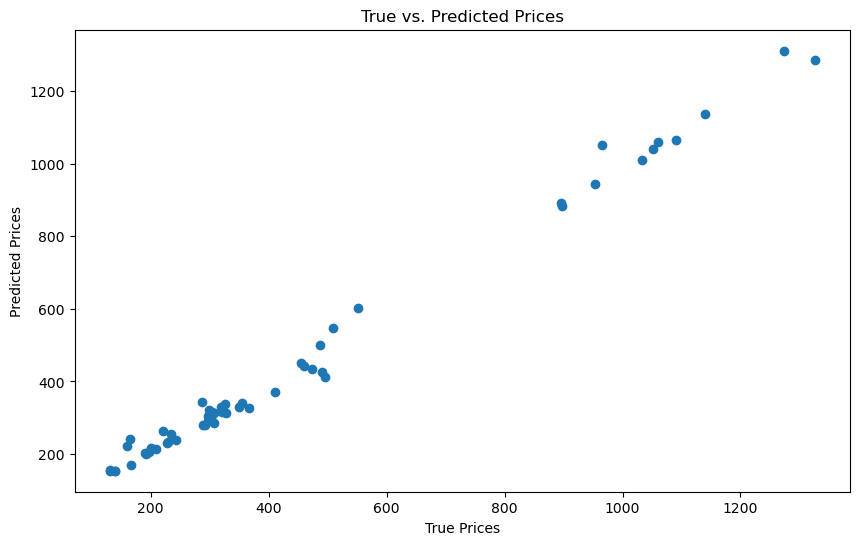

In [8]:
# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", loss)

# Make predictions
predictions = model.predict(X_test_scaled)

# Plot the predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs. Predicted Prices')
plt.show()

In [9]:
# Save the model
model.save('trained_model.h5')